__EDA__ involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

As we noticed in the `Data_Wrangling` notebook, the data is pretty much clean with no NaN observations.

### Import libraries

In [1]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

### Read the data

In [2]:
# Importing train and test subsets
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")
test_labels_df = pd.read_csv("../data/test_labels.csv")

In [3]:
# Take a look at the data
train_df.head(n=3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0


In [4]:
test_df.head(n=3)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."


In [5]:
test_labels_df.head(3)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1


The data comes from a large number of Wikipedia comments which have been labeled by human raters for toxic behavior.

In [6]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


### Data analysis

In [7]:
# Concatenate test and test_labels onto one dataFrame
test_df = pd.merge(left=test_df, right=test_labels_df, on=["id"])

# print total observations in train and test subsets
print("Train DataFrame:\t{}".format(train_df.shape))
print("Test DataFrame: \t{}".format(test_df.shape))

Train DataFrame:	(159571, 8)
Test DataFrame: 	(153164, 8)


In [8]:
test_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


In [9]:
# Check for clean comments
train_df["tags"] = np.sum(train_df.iloc[:, 2:], axis=1)
test_df["tags"] = np.sum(test_df.iloc[:, 2:], axis=1)

# print(train_df["tags"].sample(10))
train_df["is_clean"] = train_df["tags"].apply(lambda x : 1 if x == 0 else 0)
test_df["is_clean"] = test_df["tags"].apply(lambda x: 1 if x == 0 else 0)

We can notice that there are multiple cases where a comment has more than one label.

In [10]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tags,is_clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,1


In [11]:
test_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tags,is_clean
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1,-6,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1,-6,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1,-6,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1,-6,0
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1,-6,0


A value of `-1` indicates the observation wasn't used for scoring on the dataset. Thus, we proceed to eliminate these observations from the test set.

In [12]:
# Save only samples that have a real toxic behavior scoring.
test_df = test_df[test_df["tags"] >= 0]

In [13]:
# Check if there is only positive values under "tags" for the test set.
test_df["tags"].value_counts()

0    57735
3     2081
1     1842
2     1530
4      611
5      165
6       14
Name: tags, dtype: int64

In [14]:
# Count how many "clean" and "toxic behavior" comments we have on the training set.
total_comm = train_df.shape[0]
total_clean_comm = train_df["is_clean"].sum()
total_not_clean_comm = total_comm - total_clean_comm

print("Total comments: {}".format(total_comm))
print("Total clean comments: {}".format(total_clean_comm))
print("Total not clean comments: {}".format(total_not_clean_comm))

Total comments: 159571
Total clean comments: 143346
Total not clean comments: 16225


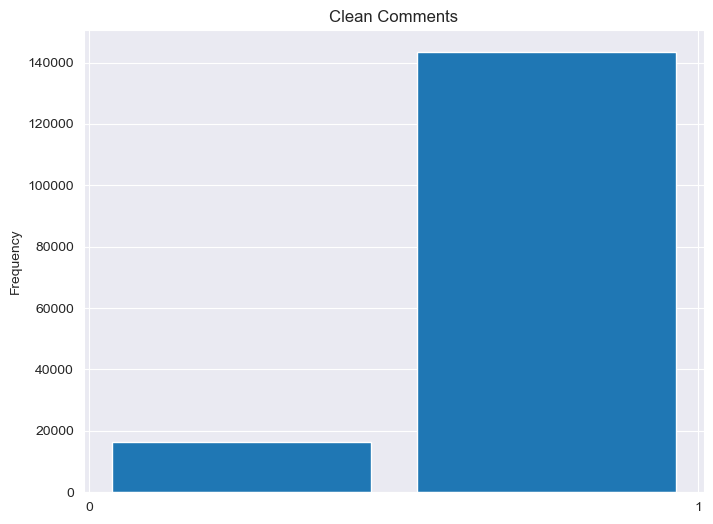

In [15]:
# Visualization of "clean" comments on the training dataset

fig, ax = plt.subplots(figsize=(8, 6))
train_df[["is_clean"]].plot(bins=2, ax=ax, kind="hist", title="Clean Comments", 
                            legend=False, rwidth=0.85, align="mid")
ax.set_xticks([0, 1])
plt.show()

In [16]:
comment_types = train_df.iloc[:, 2:-2].sum()
print(comment_types)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


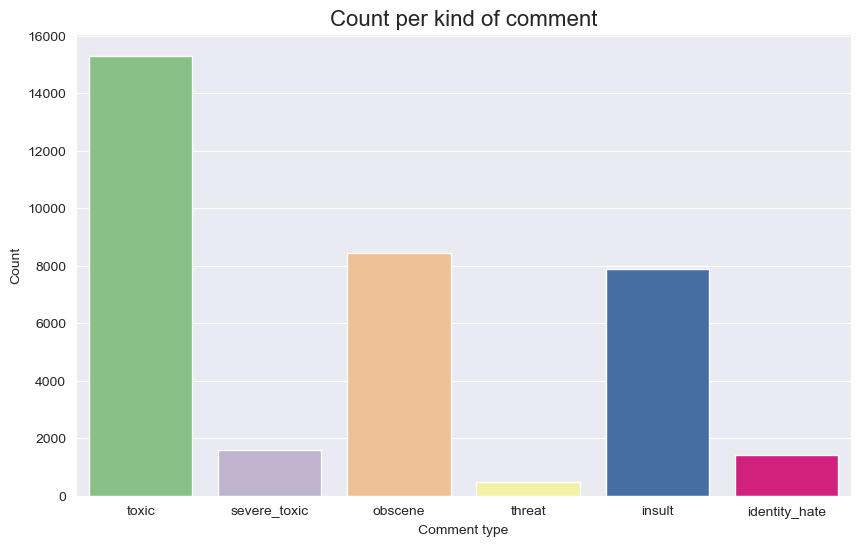

In [17]:
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=comment_types.index,
    y=comment_types.values,
    palette="Accent", ax=ax
)
ax.set_title("Count per kind of comment", fontsize=16)
ax.set_xlabel("Comment type")
ax.set_ylabel("Count")
plt.show()

As from the above graph, we notice that the different types of comments are not normally distributed, so we might face a class imbalance problem.

Let's check how many coments have multiple tags

In [18]:
count_tags = train_df["tags"].value_counts()
print(count_tags)

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: tags, dtype: int64


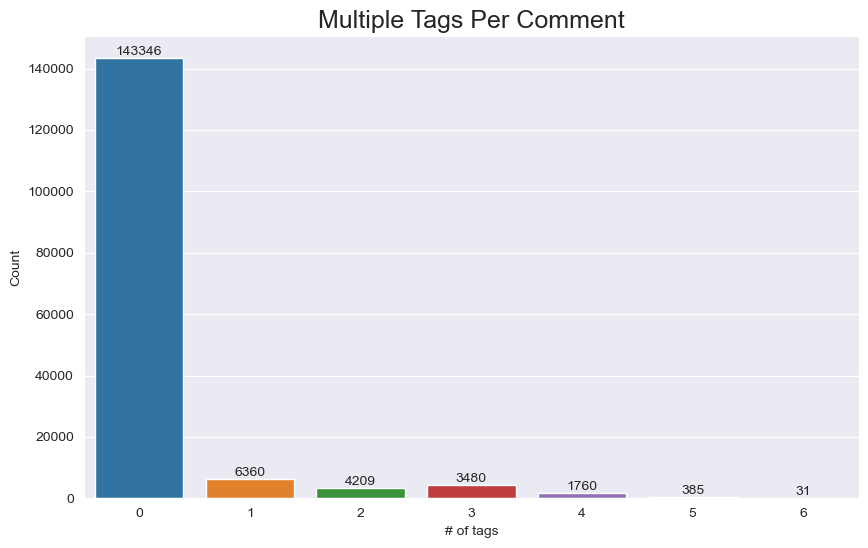

In [19]:
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=count_tags.index,
    y=count_tags.values
)
ax.set_title("multiple tags per comment".title(),
            fontsize=18)
ax.set_xlabel("# of tags")
ax.set_ylabel("Count")

# Make some labels
rects = ax.patches
for rect, tag in zip(rects, count_tags):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, tag,
            ha = "center", va = "bottom")
plt.show()

### Undersample Train and Test Data

We can see on the last figure that our data is imabalanced. We proceed to randomly delete samples from the majority class.

In [20]:
def resample(df, size=8000, replace=False, train=True):
    """
    Function to downsample data to 1000 observations from de majority class and reduce size of test set
    """
    # Check to see if dealing with train or test set
    if train == True:      
        # Select observations that have clean comments only
        clean_df = df[df["is_clean"] == 1]
        not_clean_df = df[df["is_clean"] != 1]
    
        # Resample data to 10,000 observations
        undersample_df = df.loc[np.random.choice(clean_df.index, size=size, replace=replace)]
        
        # Merge undersampled dataset with the rest of observations that contain not clean comments.
        resampled_df = pd.concat([undersample_df, not_clean_df], axis=0)
    else:
        resampled_df = df.loc[np.random.choice(df.index, size=5000, replace=replace )] 
        
    return resampled_df

In [21]:
train_resampled = resample(train_df, train=True)
test_resampled = resample(test_df, train=False)

### Visualize Resampled Train Data

In [22]:
train_resampled.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tags,is_clean
4063,0adcbf0f65116413,Is this some kind of joke?\n\nI'm baffled and...,0,0,0,0,0,0,0,1
139390,ea0c16d5ca41be0d,"""\n\n Sneaky, but not sneaky enough. Blocked f...",0,0,0,0,0,0,0,1
5038,0d5ec05225b765a8,"""\n\nResponse to the disappearance of Madelein...",0,0,0,0,0,0,0,1
153613,9fd7e6b37010c079,(The following is not a formal request to be u...,0,0,0,0,0,0,0,1
106679,3a936b564b137b6f,She asked me to look over the page for her. Pl...,0,0,0,0,0,0,0,1


In [23]:
train_resampled["is_clean"].value_counts()

0    16225
1     8000
Name: is_clean, dtype: int64

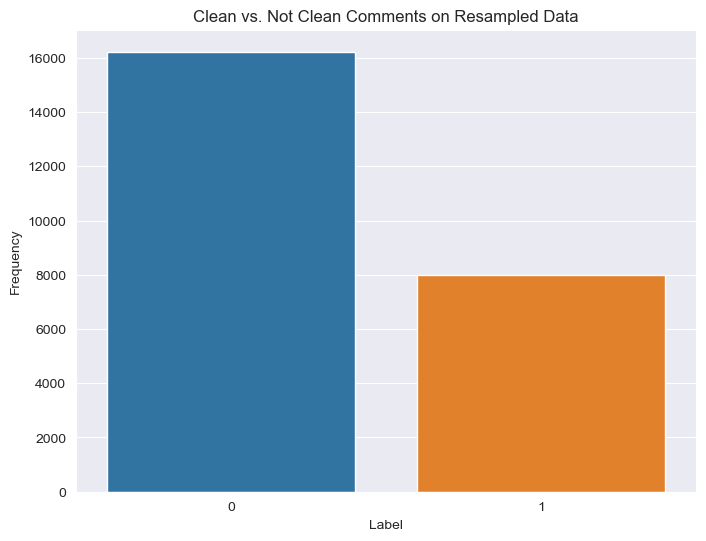

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=train_resampled["is_clean"].value_counts().index,
                 y=train_resampled["is_clean"].value_counts().values)
ax.set_title("Clean vs. Not Clean Comments on Resampled Data")
ax.set(xlabel="Label", ylabel="Frequency")
plt.show()

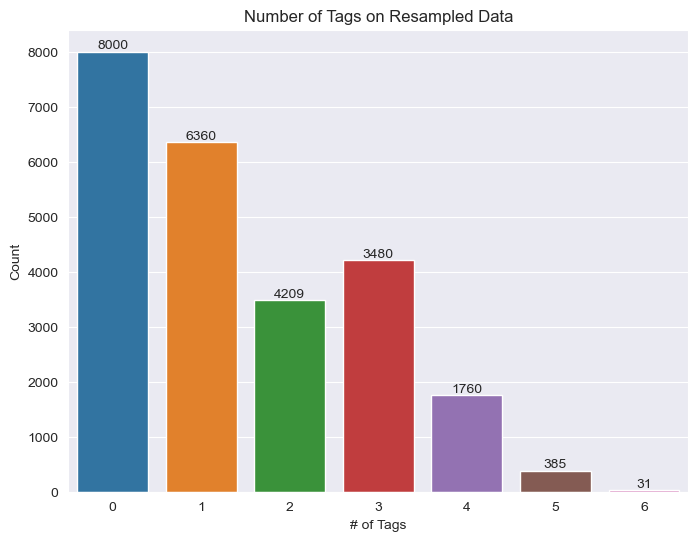

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=train_resampled["tags"].value_counts().index, 
                 y=train_resampled["tags"].value_counts().values)
ax.set(xlabel="# of Tags",
       ylabel="Count",
       title="Number of Tags on Resampled Data")

# Make some labels
rects = ax.patches
for rect, tag in zip(rects, train_resampled["tags"].value_counts()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, tag,
            ha = "center", va = "bottom")
plt.show()

### Relationship between features

Let's have a look at the relation between tags.

In [26]:
# Correlation plot
# Isolate columns for our correlation matrix.
corr_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
corr_df = train_resampled[corr_columns]

# Correlation matrix
corr = corr_df.corr()
corr

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.202875,0.465337,0.090576,0.433085,0.151909
severe_toxic,0.202875,1.000000,0.335530,0.096376,0.302870,0.157015
obscene,0.465337,0.335530,1.000000,0.083633,0.630107,0.200838
threat,0.090576,0.096376,0.083633,1.000000,0.096041,0.089241
insult,0.433085,0.302870,0.630107,0.096041,1.000000,0.265096
identity_hate,0.151909,0.157015,0.200838,0.089241,0.265096,1.000000


We can see that there is not a negative correlation between tags

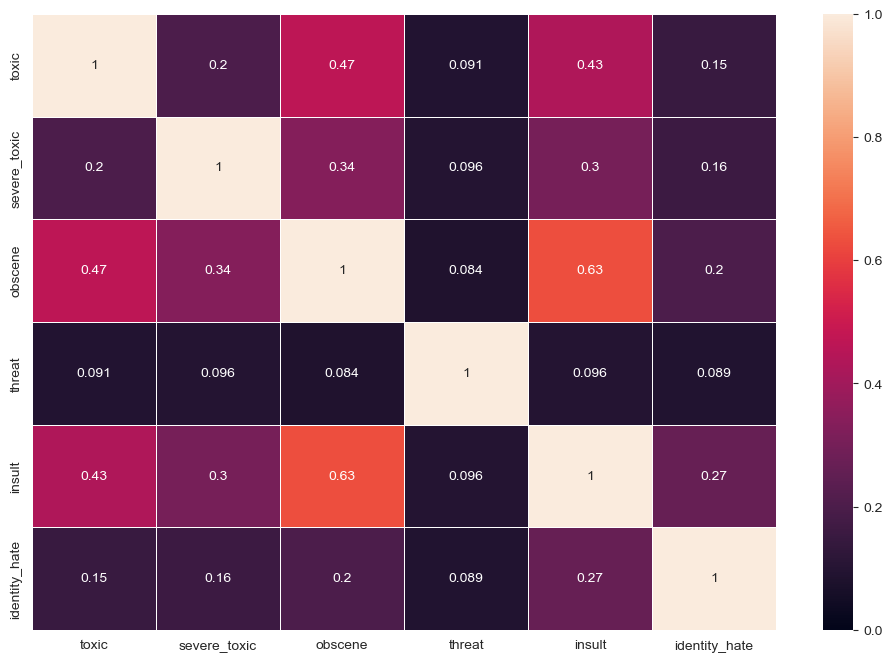

In [27]:
# Visualize correlation matrix
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    linewidths=0.5,
    ax=ax,
    vmin=0,
    vmax=1
)
plt.show()

The above plot indicates a pattern of co-occurrance. It does not apply here, since the variables involved are `categorical` variables.

In [28]:
column_names = corr_columns + ["is_clean"]
for col in column_names:
    print("\n* {} comment:".format(col))
    print(train_resampled[train_resampled[col] == 1]["comment_text"].iloc[np.random.randint(0, 20)])


* toxic comment:
Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...

* severe_toxic comment:
i have a dick, its bigger than yours! hahaha

* obscene comment:
My Band Page's deletion. You thought I was gone. 

Deleting the comment I posted on your 'talk page' does not delete my feelings for your hasty decision to delete my page. You, sir, are still a cock-sucking douche fuck. Sit back for a second and think about what your life has become. ............ Done? That didn't take long did it? Nope. Because, as I am most certainly aware, your life is a shitstorm of sitting in front of the computer masturbating to fictional creatures. Your attempts to get rid of me are mediocre at best. You are constantly sucking the dick of fai

We can see that each comment is includes alphanumeric and special symbols.

### WordCloud Representation

In [29]:
# Importing WordCloud necessary modules
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
def wordcloud_gen(subset, w=2500, h=1800, collocations=False, backgr_color="black", stopwords=stopwords):
    text = subset["comment_text"].values
    cloud = WordCloud(stopwords = stopwords, width=800, height=800,
                      background_color = "white",
                      collocations = collocations).generate(" ".join(text))
    return cloud

In [ ]:
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
plt.tight_layout()
fig.suptitle("WordCloud", fontsize=20, y=1.1)
for label, ax in zip(labels, axs.ravel()):
    ax.imshow(wordcloud_gen(subset=train_resampled.loc[train_resampled[label] == 1]))
    ax.set_axis_off()
    ax.set_title(label)

### Save DataFrame

In [ ]:
.#

In [ ]:
train_resampled.head()

In [ ]:
test_resampled.head()

In [ ]:
train_df.to_csv(path_or_buf="../data/train_EDA.csv", index=False)
test_df.to_csv(path_or_buf="../data/test_EDA.csv", index=False)